# Maternal Mortality Indicator
- **Project: Analysis of the dynamics of COVID-19 infection in Colombia**
- **Analysis: ANOVA**
- **Data: SIVIGILA - Weekly maternal mortality ratio by Department in Colombia [2018-2020]**
- **Created by: Andrés Segura Tinoco**
- **Created on: June 26, 2020**

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Import Plot libraries
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [3]:
# Read raw data
dataURL = "../data/mm_weekly_dpt_data.csv"
rawdata = pd.read_csv(dataURL)
rawdata

,zone,date,year,month,week,value
0,AMAZONIA,1/1/2018,2018,1,1,1
1,AMAZONIA,1/7/2018,2018,1,2,0
2,AMAZONIA,1/14/2018,2018,1,3,0
3,AMAZONIA,1/21/2018,2018,1,4,0
4,AMAZONIA,1/28/2018,2018,1,5,0
...,...,...,...,...,...,...
555,PACIFICO,1/19/2020,2020,1,4,1
556,PACIFICO,1/26/2020,2020,1,5,0
557,PACIFICO,2/2/2020,2020,2,6,1
558,PACIFICO,2/9/2020,2020,2,7,2


## 1. Explore data

In [4]:
rawdata.pivot_table(values='value', columns='zone', aggfunc=np.mean)

zone,AMAZONIA,ANDINA,CARIBE,ORINOQUIA,PACIFICO
value,0.276786,2.955357,1.839286,0.419643,1.1875


In [5]:
rawdata.pivot_table(values='value', columns='zone', aggfunc=np.median)

zone,AMAZONIA,ANDINA,CARIBE,ORINOQUIA,PACIFICO
value,0.0,2.5,1.0,0.0,1.0


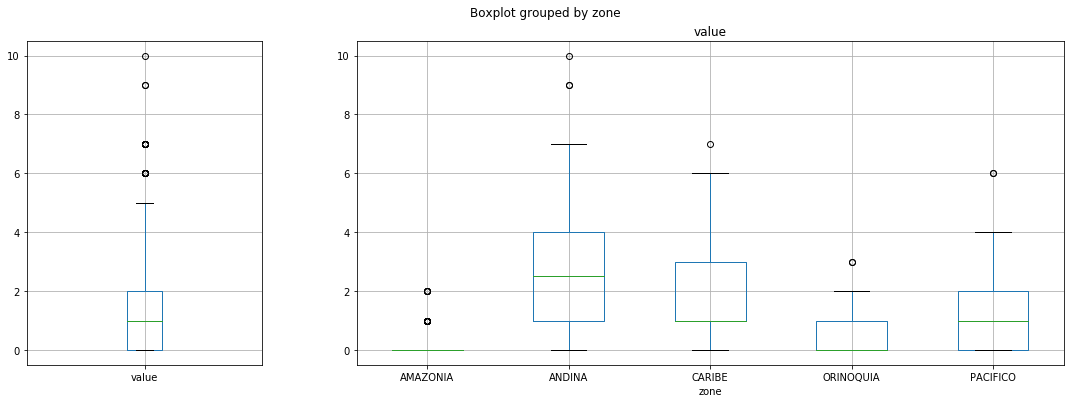

In [6]:
# Boxplot by Colombia region
fig = plt.figure(figsize = (18, 6))
fig.subplots_adjust()
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 
ax0 = plt.subplot(gs[0])
rawdata.boxplot(ax=ax0, column='value')
ax1 = plt.subplot(gs[1])
rawdata.boxplot(ax=ax1, column='value', by='zone')
plt.show()

## 2. Assumptions Validation

In [7]:
zone1 = rawdata[rawdata.zone == 'AMAZONIA'].value
zone2 = rawdata[rawdata.zone == 'ANDINA'].value
zone3 = rawdata[rawdata.zone == 'CARIBE'].value
zone4 = rawdata[rawdata.zone == 'ORINOQUIA'].value
zone5 = rawdata[rawdata.zone == 'PACIFICO'].value

### 2.1. Normality Test

In statistics, **normality tests** are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.
- $H_0$: data follow normal distribution.
- $H_1$: data does not follow normal distribution.

#### AMAZONIA Zone

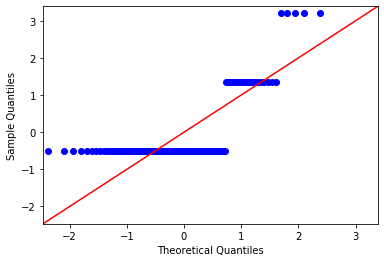

In [8]:
fig = sm.qqplot(zone1, stats.norm, fit=True, line='45')

In [9]:
sr, sp = stats.shapiro(zone1)
kr, kp = stats.kstest(zone1, 'norm')
print('P-value - Shapiro:', sp, ', KS:', kp)

P-value - Shapiro: 6.5071354026566e-17 , KS: 2.0408421890614952e-26


#### ANDINA Zone

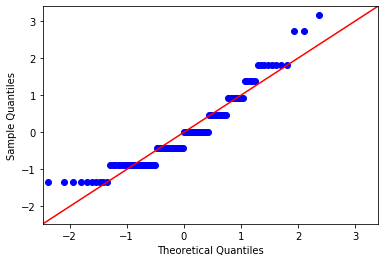

In [10]:
fig = sm.qqplot(zone2, stats.norm, fit=True, line='45')

In [11]:
sr, sp = stats.shapiro(zone2)
kr, kp = stats.kstest(zone2, 'norm')
print('P-value - Shapiro:', sp, ', KS:', kp)

P-value - Shapiro: 2.081438424283988e-06 , KS: 3.922250119198097e-66


#### CARIBE Zone

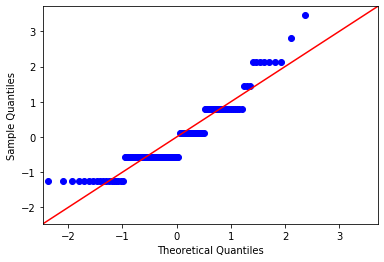

In [12]:
fig = sm.qqplot(zone3, stats.norm, fit=True, line='45')

In [13]:
sr, sp = stats.shapiro(zone3)
kr, kp = stats.kstest(zone3, 'norm')
print('P-value - Shapiro:', sp, ', KS:', kp)

P-value - Shapiro: 5.95131481873068e-08 , KS: 5.466074186124914e-52


#### ORINOQUIA Zone

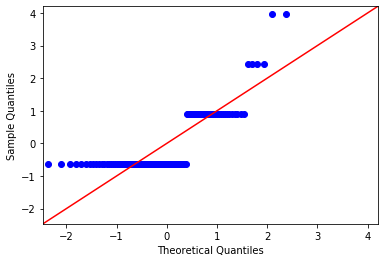

In [14]:
fig = sm.qqplot(zone4, stats.norm, fit=True, line='45')

In [15]:
sr, sp = stats.shapiro(zone4)
kr, kp = stats.kstest(zone4, 'norm')
print('P-value - Shapiro:', sp, ', KS:', kp)

P-value - Shapiro: 5.446445991284148e-15 , KS: 2.0408421890614952e-26


#### PACIFICO Zone

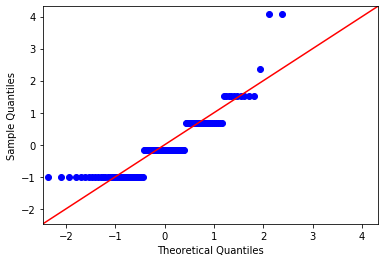

In [16]:
fig = sm.qqplot(zone5, stats.norm, fit=True, line='45')

In [17]:
sr, sp = stats.shapiro(zone5)
kr, kp = stats.kstest(zone5, 'norm')
print('P-value - Shapiro:', sp, ', KS:', kp)

P-value - Shapiro: 3.120573799364479e-10 , KS: 1.1809453394874326e-27


#### Result
The data for any subset of data follows the normal distribution, since all p-values are less than alpha of 5% significance ($H_0$ is rejected).

### 2.2. Variance Test

In [18]:
rawdata.pivot_table(values='value', columns='zone', aggfunc=np.std)

zone,AMAZONIA,ANDINA,CARIBE,ORINOQUIA,PACIFICO
value,0.540434,2.231585,1.492042,0.652623,1.189528


In [19]:
scipy.stats.levene(zone1, zone2, zone3, zone4, zone5)

LeveneResult(statistic=39.276815077156584, pvalue=5.674148645702046e-29)

#### Result
The $H_0$ (that the subsets have the same variance) is rejected, because the p-value is less than the alpha of 5% significance.

### 2.3. Kruskal-Wallis

In [20]:
scipy.stats.kruskal(zone1, zone2, zone3, zone4, zone5)

KruskalResult(statistic=217.09797374760538, pvalue=7.895549306970286e-46)

#### Result
The $H_0$ (that the subsets have the same variance) is rejected, because the p-value is less than the alpha of 5% significance.

### 2.4. Anova

In [21]:
stats.f_oneway(zone1, zone2, zone3, zone4, zone5)

F_onewayResult(statistic=72.84446702955974, pvalue=1.3393300135975078e-49)

#### Result
The $H_0$ (that the subsets have the same variance) is rejected, because the p-value is less than the alpha of 5% significance.

### Conclusion
Based on Variance, Kruskal-Wallis and Anova tests, it is concluded that the datasets do not have the same variance and therefore, it is not recommended to create 1 single model to represent the 5 regions of Colombia.

---
End of analysis